<a href="https://colab.research.google.com/github/pablocurcodev/machine_learning/blob/main/2_NumPy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NumPy Basics: Arrays and Vectorized Computation**

NumPy, short for Numerical Python, is one of the most important foundational packages for numerical computing in Python. Many computational packages providing scientific functionality use NumPy’s array objects as one of the standard interface lingua francas for data exchange. Much of the knowledge about NumPy that I cover is transferable to pandas as well.

Here are some of the things you’ll find in NumPy:

ndarray, an efficient multidimensional array providing fast array-oriented arithmetic operations and flexible broadcasting capabilities

Mathematical functions for fast operations on entire arrays of data without having to write loops

Tools for reading/writing array data to disk and working with memory-mapped files

Linear algebra, random number generation, and Fourier transform capabilities

A C API for connecting NumPy with libraries written in C, C++, or FORTRAN

Source: https://learning.oreilly.com/library/view/python-for-data/9781098104023/ch04.html

For most data analysis applications, the main areas of functionality are:

Fast array-based operations for data munging and cleaning, subsetting and filtering, transformation, and any other kind of computation

Common array algorithms like sorting, unique, and set operations

Efficient descriptive statistics and aggregating/summarizing data

Data alignment and relational data manipulations for merging and joining heterogeneous datasets

Expressing conditional logic as array expressions instead of loops with if-elif-else branches

Group-wise data manipulations (aggregation, transformation, and function application)

*   https://numpy.org/
*   https://numpy.org/doc/stable/
*   https://numpy.org/doc/stable/user/absolute_beginners.html









In [ ]:
import numpy as np

my_arr = np.arange(1_000_000)

my_list = list(range(1_000_000))

%timeit my_arr2 = my_arr * 2

%timeit my_list2 = [x * 2 for x in my_list]

# NumPy-based algorithms are generally 10 to 100 times faster (or more) than their pure Python counterparts and use significantly less memory.


650 µs ± 33.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
84.8 ms ± 20.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## **The NumPy ndarray: A Multidimensional Array Object**

One of the key features of NumPy is its N-dimensional array object, or ndarray, which is a fast, flexible container for large datasets in Python. Arrays enable you to perform mathematical operations on whole blocks of data using similar syntax to the equivalent operations between scalar elements.

In [ ]:
import numpy as np

data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])

print(data)

print(data * 10)

print(data + data)

[[ 1.5 -0.1  3. ]
 [ 0.  -3.   6.5]]
[[ 15.  -1.  30.]
 [  0. -30.  65.]]
[[ 3.  -0.2  6. ]
 [ 0.  -6.  13. ]]


An ndarray is a generic multidimensional container for homogeneous data; that is, all of the elements must be the same type. Every array has a shape, a tuple indicating the size of each dimension, and a dtype, an object describing the data type of the array

In [ ]:
print(data.shape)
print(data.dtype)

(2, 3)
float64


The easiest way to create an array is to use the array function. This accepts any sequence-like object (including other arrays) and produces a new NumPy array containing the passed data. For example, a list is a good candidate for conversion

In [ ]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

[6.  7.5 8.  0.  1. ]


Nested sequences, like a list of equal-length lists, will be converted into a multidimensional array:

In [ ]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)

arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

Since data2 was a list of lists, the NumPy array arr2 has two dimensions, with shape inferred from the data. We can confirm this by inspecting the ndim and shape attributes

In [ ]:
print(arr2.ndim)
print(arr2.shape)

2
(2, 4)


In addition to numpy.array, there are a number of other functions for creating new arrays. As examples, numpy.zeros and numpy.ones create arrays of 0s or 1s, respectively, with a given length or shape. numpy.empty creates an array without initializing its values to any particular value. To create a higher dimensional array with these methods, pass a tuple for the shape

In [ ]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [ ]:
np.empty((2, 3, 2))

array([[[4.78402986e-310, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]],

       [[0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000],
        [0.00000000e+000, 0.00000000e+000]]])

It’s not safe to assume that numpy.empty will return an array of all zeros. This function returns uninitialized memory and thus may contain nonzero “garbage” values. You should use this function only if you intend to populate the new array with data.

numpy.arange is an array-valued version of the built-in Python range function

In [ ]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

You can also use np.linspace() to create an array with values that are spaced linearly in a specified interval

In [ ]:
np.linspace(0, 10, num=5)

array([ 0. ,  2.5,  5. ,  7.5, 10. ])

## **Data Types for ndarrays**

The data type or dtype is a special object containing the information (or metadata, data about data) the ndarray needs to interpret a chunk of memory as a particular type of data

In [ ]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr2 = np.array([1, 2, 3], dtype=np.int32)

print(arr1.dtype)
print(arr2.dtype)

float64
int32


In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print(arr.dtype)

float_arr = arr.astype(np.float64)
print(float_arr.dtype)

int64
float64


In [ ]:
float_arr = arr.astype(np.float64)
print(float_arr)

[1. 2. 3. 4. 5.]


In [ ]:
print(float_arr.dtype)

float64


In [ ]:
# In this example, integers were cast to floating point. If I cast some floating-point numbers to be of integer data type, the decimal part will be truncated:

arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)
print(arr.dtype)
arr = arr.astype(np.int32)
print(arr)
print(arr.dtype)


[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
float64
[ 3 -1 -2  0 12 10]
int32


There are shorthand type code strings you can also use to refer to a dtype:

In [ ]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

## **Arithmetic with NumPy Arrays**

Arrays are important because they enable you to express batch operations on data without writing any for loops. NumPy users call this vectorization. Any arithmetic operations between equal-size arrays apply the operation element-wise

In [ ]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])

print(arr)
print(arr * arr)
print(arr - arr)
print(1 / arr)
print(arr ** 2)

[[1. 2. 3.]
 [4. 5. 6.]]
[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


In [ ]:
# Evaluating operations between differently sized arrays is called broadcasting
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
print(arr2 > arr)

[[False  True False]
 [ True False  True]]


## **Basic Indexing and Slicing**

In [ ]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])
arr[5:8] = 12
print(arr)
arr_slice = arr[5:8]
print(arr_slice)

# Now, when I change values in arr_slice, the mutations are reflected in the original array arr:
arr_slice[1] = 12345
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]
[12 12 12]
[    0     1     2     3     4    12 12345    12     8     9]


In [ ]:
# The “bare” slice [:] will assign to all values in an array
arr_slice[:] = 64
print(arr)

[ 0  1  2  3  4 64 64 64  8  9]


In [ ]:
# If you want a copy of a slice of an ndarray instead of a view,
# you will need to explicitly copy the array—for example,
# arr[5:8].copy(). As you will see, pandas works this way, too.

With higher dimensional arrays, you have many more options. In a two-dimensional array, the elements at each index are no longer scalars but rather one-dimensional arrays

In [ ]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(arr2d[2])

# Thus, individual elements can be accessed recursively. But that is a bit too much work, so you can pass a comma-separated list of indices to select individual elements.
print(arr2d[0][2])
print(arr2d[0, 2])

[7 8 9]
3
3


In [ ]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [ ]:
print(arr3d[0])

[[1 2 3]
 [4 5 6]]


In [ ]:
print(arr3d[1, 0])

[7 8 9]


Note that in all of these cases where subsections of the array have been selected, the returned arrays are views.

## **Indexing with slices**

In [ ]:
arr=np.array(([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9]))
print(arr[1:6])

print(arr2d)
# select the first two rows of arr2d.
print(arr2d[:2])

[ 1  2  3  4 64]
[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 2 3]
 [4 5 6]]


In [ ]:
# select the second row but only the first two columns
lower_dim_slice = arr2d[1, :2]
lower_dim_slice

array([4, 5])

In [ ]:
# select the third column but only the first two rows
arr2d[:2, 2]


array([3, 6])

In [ ]:
# Note that a colon by itself means to take the entire axis, so you can slice only higher dimensional axes by doing

print(arr2d[:, :1])
print(arr2d[:, 1:2])


[[1]
 [4]
 [7]]
[[2]
 [5]
 [8]]


In [ ]:
# Of course, assigning to a slice expression assigns to the whole selection:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## **Boolean Indexing**

In [ ]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                  [-12, -4], [3, 4]])

print(names)
print(data)
print()
print(names == "Bob")

# This Boolean array can be passed when indexing the array:
print(data[names == "Bob"])

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]

[ True False False  True False False False]
[[4 7]
 [0 0]]


The Boolean array must be of the same length as the array axis it’s indexing. You can even mix and match Boolean arrays with slices or integers (or sequences of integers; more on this later).

In [ ]:
data[names == "Bob", 1:]

array([[7],
       [0]])

In [ ]:
data[names == "Bob", 1]

array([7, 0])

In [ ]:
# To select everything but "Bob" you can either use != or negate the condition
# using ~:

print(names != "Bob")
print(data[~(names == "Bob")])

# The ~ operator can be useful when you want to invert a Boolean array referenced by a variable

cond = names == "Bob"
print(data[~cond])

[False  True  True False  True  True  True]
[[  0   2]
 [ -5   6]
 [  1   2]
 [-12  -4]
 [  3   4]]
[[  0   2]
 [ -5   6]
 [  1   2]
 [-12  -4]
 [  3   4]]


In [ ]:
# To select two of the three names to combine multiple Boolean conditions, use Boolean arithmetic operators like & (and) and | (or)

mask = (names == "Bob") | (names == "Will")
print(mask)
print(data[mask])

[ True False  True  True  True False False]
[[ 4  7]
 [-5  6]
 [ 0  0]
 [ 1  2]]


Selecting data from an array by Boolean indexing and assigning the result to a
new variable always creates a copy of the data, even if the returned array is unchanged.

The Python keywords and and or do not work with Boolean arrays. Use & (and) and | (or) instead.



In [ ]:
print(data)
data[data < 0] = 0
print(data)

data[names != "Joe"] = 7
print(data)

[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]
[[4 7]
 [0 2]
 [0 6]
 [0 0]
 [1 2]
 [0 0]
 [3 4]]
[[7 7]
 [0 2]
 [7 7]
 [7 7]
 [7 7]
 [0 0]
 [3 4]]


## **Transposing Arrays and Swapping Axes**

In [ ]:
arr = np.arange(15).reshape((3, 5))
print(arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]


In [ ]:
print(arr.T)

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


When doing matrix computations, you may do this very often—for example, when computing the inner matrix product using numpy.dot

In [ ]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])

print(arr)
print('-----------------')
print(np.dot(arr.T, arr))

[[ 0  1  0]
 [ 1  2 -2]
 [ 6  3  2]
 [-1  0 -1]
 [ 1  0  1]]
-----------------
[[39 20 12]
 [20 14  2]
 [12  2 10]]


The @ infix operator is another way to do matrix multiplication

In [ ]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

Simple transposing with .T is a special case of swapping axes. ndarray has the method swapaxes, which takes a pair of axis numbers and switches the indicated axes to rearrange the data

In [ ]:
arr

array([[ 0,  1,  0],
       [ 1,  2, -2],
       [ 6,  3,  2],
       [-1,  0, -1],
       [ 1,  0,  1]])

In [ ]:
arr.swapaxes(0, 1)

# swapaxes similarly returns a view on the data without making a copy

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## **Pseudorandom Number Generation**
The numpy.random module supplements the built-in Python random module with functions for efficiently generating whole arrays of sample values from many kinds of probability distributions.

In [ ]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-0.28211506,  0.64555112, -1.07014992, -1.8003429 ],
       [-0.37414587,  1.36826528, -0.87534142, -0.41097224],
       [-0.69931644, -0.55170371, -2.76348711, -0.31532251],
       [ 0.43032908, -0.87828508,  0.58605502,  1.28460873]])

Python’s built-in random module, by contrast, samples only one value at a time. As you can see from this benchmark, numpy.random is well over an order of magnitude faster for generating very large samples:

In [ ]:
from random import normalvariate

N = 1_000_000

%timeit samples = [normalvariate(0, 1) for _ in range(N)]

%timeit np.random.standard_normal(N)

979 ms ± 279 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
28.9 ms ± 581 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
# These random numbers are not truly random (rather, pseudorandom) but instead
# are generated by a configurable random number generator that determines
# deterministically what values are created. Functions like
# numpy.random.standard_normal use the numpy.random module’s default random
# number generator, but your code can be configured to use an explicit generator

rng = np.random.default_rng(seed=12345)

data = rng.standard_normal((2, 3))

data



array([[-1.42382504,  1.26372846, -0.87066174],
       [-0.25917323, -0.07534331, -0.74088465]])

**Method**	Description
* **permutation**	Return a random permutation of a sequence, or return a permuted range
* **shuffle**	Randomly permute a sequence in place
* **uniform**	Draw samples from a uniform distribution
* **integers**	Draw random integers from a given low-to-high range
* **standard_normal**	Draw samples from a normal distribution with mean 0 and standard deviation 1
* **binomial**	Draw samples from a binomial distribution
* **normal**	Draw samples from a normal (Gaussian) distribution
* **beta**	Draw samples from a beta distribution
* **chisquare**	Draw samples from a chi-square distribution
* **gamma**	Draw samples from a gamma distribution
* **uniform**	Draw samples from a uniform [0, 1) distribution

## **Universal Functions: Fast Element-Wise Array Functions**

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays. You can think of them as fast vectorized wrappers for simple functions that take one or more scalar values and produce one or more scalar results.

In [ ]:
arr = np.arange(10)
print(arr)
print(np.sqrt(arr))

[0 1 2 3 4 5 6 7 8 9]
[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]


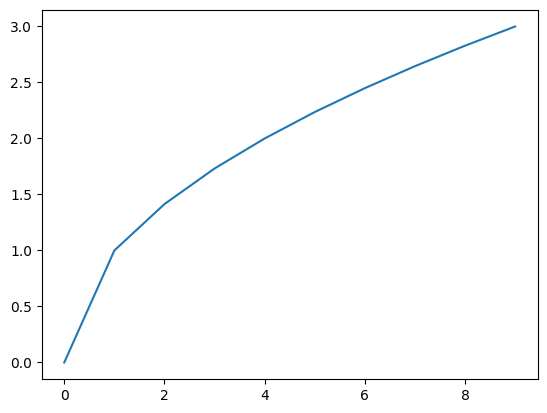

In [ ]:
import matplotlib.pyplot as plt

plt.plot(arr ,np.sqrt(arr))
plt.show()

In [ ]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

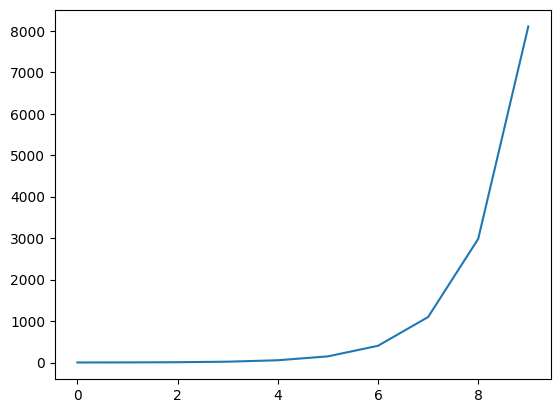

In [ ]:
plt.plot(arr ,np.exp(arr))
plt.show()

These are referred to as unary ufuncs. Others, such as numpy.add or numpy.maximum, take two arrays (thus, binary ufuncs) and return a single array as the result

In [ ]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)

print(x)
print(y)

[-1.3677927   0.6488928   0.36105811 -1.95286306  2.34740965  0.96849691
 -0.75938718  0.90219827]
[-0.46695317 -0.06068952  0.78884434 -1.25666813  0.57585751  1.39897899
  1.32229806 -0.29969852]


In [ ]:
np.maximum(x, y)

array([-0.46695317,  0.6488928 ,  0.78884434, -1.25666813,  2.34740965,
        1.39897899,  1.32229806,  0.90219827])

While not common, a ufunc can return multiple arrays. numpy.modf is one example: a vectorized version of the built-in Python math.modf, it returns the fractional and integral parts of a floating-point array

In [ ]:
arr = rng.standard_normal(7) * 5
print(arr)

[ 4.51459671 -8.10791367 -0.7909463   2.24741966 -6.71800536 -0.40843795
  8.62369966]


In [ ]:
remainder, whole_part = np.modf(arr)

print(remainder)
print(whole_part)

[ 0.51459671 -0.10791367 -0.7909463   0.24741966 -0.71800536 -0.40843795
  0.62369966]
[ 4. -8. -0.  2. -6. -0.  8.]


In [ ]:
out = np.zeros_like(arr)

# Ufuncs accept an optional out argument that allows them to assign their results into an existing array rather than create a new one
np.add(arr, 1, out=out)
print(out)

[ 5.51459671 -7.10791367  0.2090537   3.24741966 -5.71800536  0.59156205
  9.62369966]


## **Array-Oriented Programming with Arrays**

Using NumPy arrays enables you to express many kinds of data processing tasks as concise array expressions that might otherwise require writing loops. This practice of replacing explicit loops with array expressions is referred to by some people as vectorization. In general, vectorized array operations will usually be significantly faster than their pure Python equivalents, with the biggest impact in any kind of numerical computations.

As a simple example, suppose we wished to evaluate the function sqrt(x^2 + y^2) across a regular grid of values. The numpy.meshgrid function takes two one-dimensional arrays and produces two two-dimensional matrices corresponding to all pairs of (x, y) in the two arrays:

In [ ]:
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

Now, evaluating the function is a matter of writing the same expression you would write with two points

In [ ]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

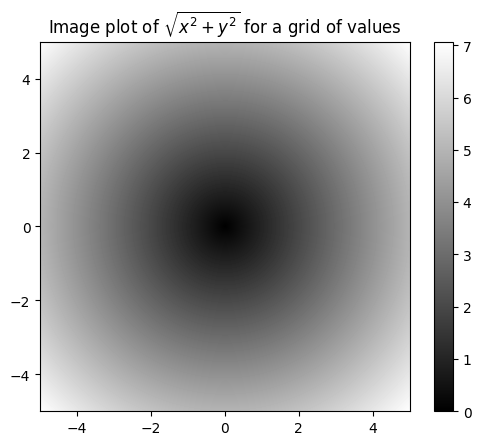

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## **Expressing Conditional Logic as Array Operations**

The numpy.where function is a vectorized version of the ternary expression x if condition else y. Suppose we had a Boolean array and two arrays of values

In [ ]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

Suppose we wanted to take a value from xarr whenever the corresponding value in cond is True, and otherwise take the value from yarr. A list comprehension doing this might look like:

In [ ]:
result = [(x if c else y)
           for x, y, c in zip(xarr, yarr, cond)]
result

[1.1, 2.2, 1.3, 1.4, 2.5]

This has multiple problems. First, it will not be very fast for large arrays (because all the work is being done in interpreted Python code). Second, it will not work with multidimensional arrays. With numpy.where you can do this with a single function call

In [ ]:
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [ ]:
arr = rng.standard_normal((4, 4))
print(arr)
print(arr > 0)
print(np.where(arr > 0, 2, -2))

[[ 2.61815943  0.77736134  0.8286332  -0.95898831]
 [-1.20938829 -1.41229201  0.54154683  0.7519394 ]
 [-0.65876032 -1.22867499  0.25755777  0.31290292]
 [-0.13081169  1.26998312 -0.09296246 -0.06615089]]
[[ True  True  True False]
 [False False  True  True]
 [False False  True  True]
 [False  True False False]]
[[ 2  2  2 -2]
 [-2 -2  2  2]
 [-2 -2  2  2]
 [-2  2 -2 -2]]


## **Mathematical and Statistical Methods**

A set of mathematical functions that compute statistics about an entire array or about the data along an axis are accessible as methods of the array class. You can use aggregations (sometimes called reductions) like sum, mean, and std (standard deviation) either by calling the array instance method or using the top-level NumPy function. When you use the NumPy function, like numpy.sum, you have to pass the array you want to aggregate as the first argument.

In [ ]:
# Here I generate some normally distributed random data and compute some aggregate statistics:
arr = rng.standard_normal((5, 4))
print(arr)

[[-1.10821447  0.13595685  1.34707776  0.06114402]
 [ 0.0709146   0.43365454  0.27748366  0.53025239]
 [ 0.53672097  0.61835001 -0.79501746  0.30003095]
 [-1.60270159  0.26679883 -1.26162378 -0.07127081]
 [ 0.47404973 -0.41485376  0.0977165  -1.64041784]]


In [ ]:
arr.mean()

-0.08719744457434529

In [ ]:
np.mean(arr)

-0.08719744457434529

In [ ]:
arr.sum()

-1.743948891486906

Functions like mean and sum take an optional axis argument that computes the statistic over the given axis, resulting in an array with one less dimension.

[seems to be the opposite]
Here, arr.mean(axis=1) means “compute mean across the columns,” where arr.sum(axis=0) means “compute sum down the rows.”

In [ ]:
arr.mean(axis=1)

array([ 0.10899104,  0.3280763 ,  0.16502112, -0.66719934, -0.37087634])

In [ ]:
arr.mean(axis=0)

array([-0.32584615,  0.20798129, -0.06687266, -0.16405226])

In [ ]:
t = np.array([[1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5]])

print(t.sum(axis=1))
print(t.sum(axis=0))

[15 15]
[ 2  4  6  8 10]


In [ ]:
t

array([[1, 2, 3, 4, 5],
       [1, 2, 3, 4, 5]])

In [ ]:
# Other methods like cumsum and cumprod do not aggregate, instead producing an array of the intermediate results:

arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

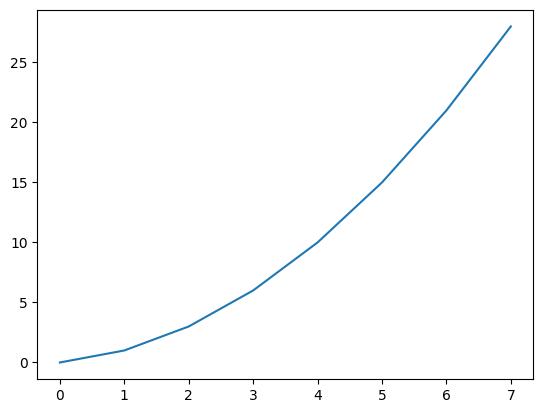

In [ ]:
plt.plot(arr.cumsum())

In multidimensional arrays, accumulation functions like cumsum return an array of the same size but with the partial aggregates computed along the indicated axis according to each lower dimensional slice

In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [ ]:
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28, 36])

In [ ]:
arr.cumsum(axis=0)

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [ ]:
arr.cumsum(axis=1)

array([[ 0,  1,  3],
       [ 3,  7, 12],
       [ 6, 13, 21]])

## **Methods for Boolean Arrays**

In [ ]:
arr = rng.standard_normal(100)
(arr > 0).sum() # Number of positive values

48

In [ ]:
(arr <= 0).sum() # Number of non-positive values

52

Two additional methods, any and all, are useful especially for Boolean arrays. any tests whether one or more values in an array is True, while all checks if every value is True

In [ ]:
bools = np.array([False, False, True, False])
bools.any()

True

In [ ]:
bools.all()

False

## **Sorting**

In [ ]:
rng = np.random.default_rng(seed=12345)
arr = rng.standard_normal(6)
arr

array([-1.42382504,  1.26372846, -0.87066174, -0.25917323, -0.07534331,
       -0.74088465])

In [ ]:
arr.sort()
arr

array([-1.42382504, -0.87066174, -0.74088465, -0.25917323, -0.07534331,
        1.26372846])

You can sort each one-dimensional section of values in a multidimensional array in place along an axis by passing the axis number to sort

In [ ]:
arr = rng.standard_normal((5, 3))
arr

array([[-1.3677927 ,  0.6488928 ,  0.36105811],
       [-1.95286306,  2.34740965,  0.96849691],
       [-0.75938718,  0.90219827, -0.46695317],
       [-0.06068952,  0.78884434, -1.25666813],
       [ 0.57585751,  1.39897899,  1.32229806]])

In [ ]:
# arr.sort(axis=0) sorts the values within each column, while arr.sort(axis=1)
# sorts across each row:
arr.sort(axis=0)
arr

array([[-1.95286306,  0.6488928 , -1.25666813],
       [-1.3677927 ,  0.78884434, -0.46695317],
       [-0.75938718,  0.90219827,  0.36105811],
       [-0.06068952,  1.39897899,  0.96849691],
       [ 0.57585751,  2.34740965,  1.32229806]])

The top-level method numpy.sort returns a sorted copy of an array (like the Python built-in function sorted) instead of modifying the array in place.

In [ ]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)
sorted_arr2

array([-10,  -3,   0,   1,   5,   7])

## **Unique and Other Set Logic**

In [ ]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [ ]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

## **File Input and Output with Arrays**
NumPy is able to save and load data to and from disk in some text or binary formats. In this section I discuss only NumPy’s built-in binary format, since most users will prefer pandas and other tools for loading text or tabular data

In [ ]:
arr = np.arange(10)
np.save("some_array", arr)

If the file path does not already end in .npy, the extension will be appended. The array on disk can then be loaded with numpy.load:

In [ ]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

You can save multiple arrays in an uncompressed archive using numpy.savez and passing the arrays as keyword arguments

In [ ]:
np.savez("array_archive.npz", a=arr, b=arr)

In [ ]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [ ]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
arch = np.load("arrays_compressed.npz")
arch["a"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## **Linear Algebra**

Linear algebra operations, like matrix multiplication, decompositions, determinants, and other square matrix math, are an important part of many array libraries. Multiplying two two-dimensional arrays with * is an element-wise product, while matrix multiplications require using a function. Thus, there is a function dot, both an array method and a function in the numpy namespace, for matrix multiplication

In [ ]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [ ]:
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [ ]:
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

In [ ]:
print(x.dot(y))

# x.dot(y) is equivalent to np.dot(x, y)

print(np.dot(x, y))

[[ 28.  64.]
 [ 67. 181.]]
[[ 28.  64.]
 [ 67. 181.]]


A matrix product between a two-dimensional array and a suitably sized one-dimensional array results in a one-dimensional array

In [ ]:
x @ np.ones(3)

array([ 6., 15.])

numpy.linalg has a standard set of matrix decompositions and things like inverse and determinant

In [ ]:
from numpy.linalg import inv, qr
X = rng.standard_normal((5, 5))

mat = X.T @ X
inv(mat)

array([[260.08615638, 188.93922946, 106.34919822,  12.06529331,
        184.51230648],
       [188.93922946, 137.88132673,  77.49025411,   8.45075787,
        134.70768995],
       [106.34919822,  77.49025411,  43.84929152,   4.60233436,
         75.85240015],
       [ 12.06529331,   8.45075787,   4.60233436,   1.00543056,
          8.03465879],
       [184.51230648, 134.70768995,  75.85240015,   8.03465879,
        132.15120903]])

In [ ]:
mat @ inv(mat)

array([[ 1.00000000e+00,  5.38617221e-14,  5.51845908e-14,
         8.05960770e-15, -4.95516251e-14],
       [ 7.38857152e-14,  1.00000000e+00, -4.18360087e-14,
        -4.52756966e-15,  5.67185585e-14],
       [ 9.74834286e-14, -2.21253532e-14,  1.00000000e+00,
        -2.54350130e-15, -7.24859902e-14],
       [ 1.56639718e-13,  9.13884412e-14,  7.38635557e-17,
         1.00000000e+00,  4.17706101e-14],
       [ 4.67951184e-14,  9.45464552e-15,  5.32448333e-14,
         5.83152787e-15,  1.00000000e+00]])

In [ ]:
# The expression X.T.dot(X) computes the dot product of X with its transpose X.T.

## **Example: Random Walks**
The simulation of random walks provides an illustrative application of utilizing array operations. Let’s first consider a simple random walk starting at 0 with steps of 1 and –1 occurring with equal probability.

Here is a pure Python way to implement a single random walk with 1,000 steps using the built-in random module

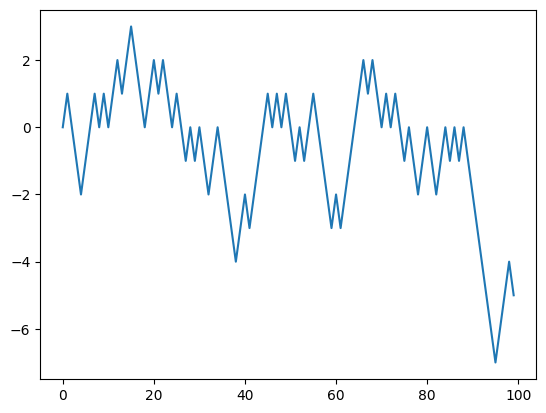

In [ ]:
import random
position = 0
walk = [position]
nsteps = 1000
for _ in range(nsteps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
#! blockend

plt.plot(walk[:100])

You might make the observation that walk is the cumulative sum of the random steps and could be evaluated as an array expression. Thus, I use the numpy.random module to draw 1,000 coin flips at once, set these to 1 and –1, and compute the cumulative sum

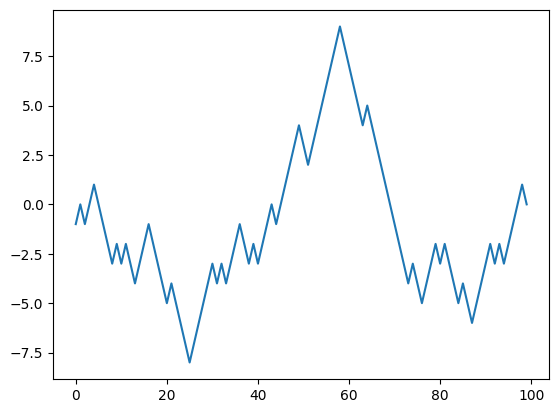

In [ ]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator
draws = rng.integers(0, 2, size=nsteps)
steps = np.where(draws == 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:100])

## **Simulating Many Random Walks at Once**

In [ ]:
nwalks = 5000
nsteps = 1000
draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(axis=1)
walks

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]])

In [ ]:
walks.max()

114

In [ ]:
walks.min()

-120

In [ ]:
hits30 = (np.abs(walks) >= 30).any(axis=1)

In [ ]:
hits30

array([False,  True,  True, ...,  True, False,  True])

In [ ]:
hits30.sum() # Number that hit 30 or -30

3395